In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create enginge function to let us query our SQLite database
# first step in connecting to our databse
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
# reflect = transfer contents of databse link above to new model of data here
Base = automap_base()
# this helped us create a class automap schemda to then let us...

# reflect the tables
# prepare function to let us create mappings 
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
# confirm that all data in SQLite link came here
Base.classes.keys()
# output shows 2 keys measurement and station returned

['measurement', 'station']

In [8]:
# we reference our 2 keys from before and save 
# set as variables to avoid calling Base.classes.keyname every time
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# create a session link to a database
# the true step in linking
# now we can create queries
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# use datetime dependency for his favorite surf date and start from there
prev_year = dt.date(2017, 8, 24) -dt.timedelta(days=365)
# added dt.timedelta function to calc the date one year back
# lets us traceback certain number of days

# Perform a query to retrieve the data and precipitation scores
# created emoty variable results to hold our precip score
results = []
# session.query function to take 2 params and reference the date and prcp
# 
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# added a filter to take out data we don't need
# added .all function at end of query to extract all results and put in list

# return the data
print(results)
# outuput gives date by day and percip on each day BUT saved as variable...


[('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 0.0), ('2016-10-09', 

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column
surf_df = pd.DataFrame(results, columns = ['date', 'precipitation'])
surf_df.sample()

,date,precipitation
825,2017-01-17,0.0


In [12]:
# Sort the dataframe by date with sort index function
# change df to 2 column and without index
surf_df = surf_df.sort_index()
print(surf_df.to_string(index=False))


      date  precipitation
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00
2016-08-28           0.01
2016-08-29           0.00
2016-08-30           0.00
2016-08-31           0.13
2016-09-01           0.00
2016-09-02           0.00
2016-09-03           0.00
2016-09-04           0.03
2016-09-05            NaN
2016-09-06            NaN
2016-09-07           0.05
2016-09-08           0.00
2016-09-09           0.03
2016-09-10           0.00
2016-09-11           0.05
2016-09-12           0.00
2016-09-13           0.02
2016-09-14           1.32
2016-09-15           0.42
2016-09-16           0.06
2016-09-17           0.05
2016-09-18           0.00
2016-09-19           0.00
2016-09-20           0.00
2016-09-21           0.00
2016-09-22           0.02
2016-09-23           0.00
2016-09-24           0.00
2016-09-25           0.00
2016-09-26           0.06
2016-09-27           0.02
2016-09-28           0.00
2016-09-29           0.00
2016-09-30  

<AxesSubplot:>

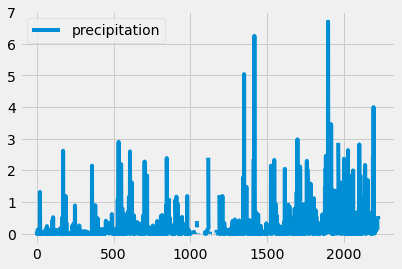

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
# our surf_df is a varaible so we use the df.plot()
surf_df.plot()
# output shows x = dates; y = total amount precipitation on the date


In [14]:
# 9.2.5 
# Use Pandas to calcualte the summary statistics for the precipitation data
surf_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# 9.3
# How many stations are available in this dataset?
# write query to get # of stations in dataset
session.query(func.count(Station.station)).all()
# use func.count to count in dataset on reference of S.s for # of stations 
# .all() to end query and results returned as list

# output shows 9 stations that hold precipitation data

[(9,)]

In [16]:
# What are the most active stations? 9.3.2
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# output shows the station ID on left column, counts of each station on right
# can look quickly at which one is more/less active station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the station id from the previous query... 
# calculate the lowest temperature recorded (min)
# highest temperature recorded (max)
# average temperature most active station (mean)
session.query(func.min(Measurement.tobs), 
              func.max(Measurement.tobs), 
              func.avg(Measurement.tobs)).\
# filter by the most active station 
# from our previous query on active vs inactive stations
filter(Measurement.station == 'USC00519281').all()

# output shows min temp of 54, max temp of 85, avg temp of 71

SyntaxError: invalid syntax (Temp/ipykernel_4724/892000958.py, line 8)

In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# create results output without df
results_updated = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

print(results_updated)

[(77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), (66.0,), 

In [19]:
# take results and make to df
final_df = pd.DataFrame(results_updated, columns = ['tobs'])
print(final_df)

     tobs
0    77.0
1    80.0
2    80.0
3    75.0
4    73.0
..    ...
346  77.0
347  77.0
348  76.0
349  76.0
350  79.0

[351 rows x 1 columns]


In [20]:
# reprint df without index column
print(final_df.to_string(index=False))

 tobs
 77.0
 80.0
 80.0
 75.0
 73.0
 78.0
 77.0
 78.0
 80.0
 80.0
 78.0
 78.0
 78.0
 73.0
 74.0
 80.0
 79.0
 77.0
 80.0
 76.0
 79.0
 75.0
 79.0
 78.0
 79.0
 78.0
 78.0
 76.0
 74.0
 77.0
 78.0
 79.0
 79.0
 77.0
 80.0
 78.0
 78.0
 78.0
 77.0
 79.0
 79.0
 79.0
 79.0
 75.0
 76.0
 73.0
 72.0
 71.0
 77.0
 79.0
 78.0
 79.0
 77.0
 79.0
 77.0
 78.0
 78.0
 78.0
 78.0
 77.0
 74.0
 75.0
 76.0
 73.0
 76.0
 74.0
 77.0
 76.0
 76.0
 74.0
 75.0
 75.0
 75.0
 75.0
 71.0
 63.0
 70.0
 68.0
 67.0
 77.0
 74.0
 77.0
 76.0
 76.0
 75.0
 76.0
 75.0
 73.0
 75.0
 73.0
 75.0
 74.0
 75.0
 74.0
 75.0
 73.0
 75.0
 73.0
 73.0
 74.0
 70.0
 72.0
 70.0
 67.0
 67.0
 69.0
 70.0
 68.0
 69.0
 69.0
 66.0
 65.0
 68.0
 62.0
 75.0
 70.0
 69.0
 76.0
 76.0
 74.0
 73.0
 71.0
 74.0
 74.0
 72.0
 71.0
 72.0
 74.0
 69.0
 67.0
 72.0
 70.0
 64.0
 63.0
 63.0
 62.0
 70.0
 70.0
 62.0
 62.0
 63.0
 65.0
 69.0
 77.0
 70.0
 74.0
 69.0
 72.0
 71.0
 69.0
 71.0
 71.0
 72.0
 72.0
 69.0
 70.0
 66.0
 65.0
 69.0
 68.0
 68.0
 68.0
 59.0
 60.0
 70.0
 73.

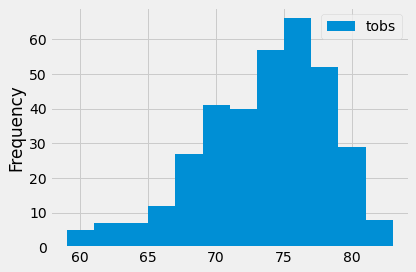

In [21]:
# plot the final_df temp observations results as a histogram
# make sure to map out how many bins (always within 5-20 range)
# each bin is a rectangular column in the plot
final_df.plot.hist(bins=12)
plt.tight_layout()

# ouput shows majority over 67 degrees; or 325/365 days with this temp.

In [22]:
# 9.4
# Write a function called `calc_temps` 
# ... that will accept start date and end date in the format '%Y-%m-%d' 
# and return
# minimum, average, and maximum temperatures for that range of dates


# Challenge